#**In this code i will entroduce an 1 qubit Quantum Key Distribution circuit like below:**

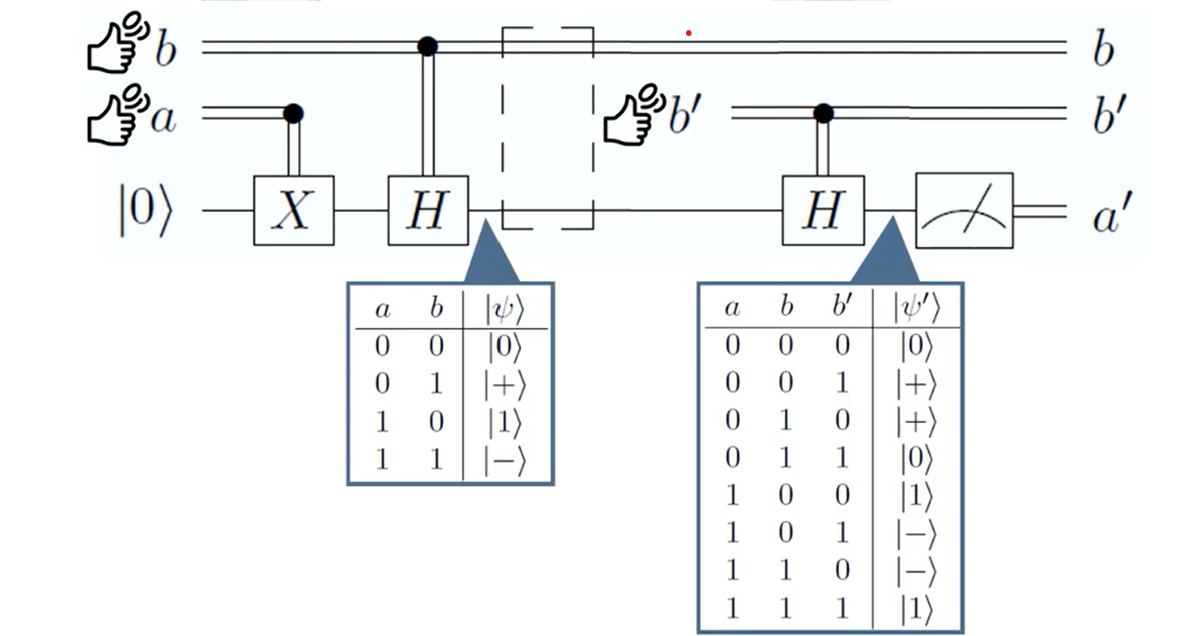

It has 2 steps, First it creates the circuit for every combination of a, b and b', show it and its state vector right before bob's measurment and the value of a, b and b'. Then it creates a table of all values of parameters and calculate the **key**.

In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install qiskit ipywidgets
!pip install pylatexenc
pip install pandas

a:      0
b:      0
b':      0


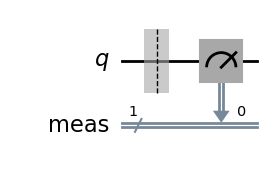

<IPython.core.display.Latex object>

a:      0
b:      0
b':      1


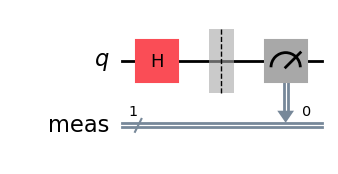

<IPython.core.display.Latex object>

a:      0
b:      1
b':      0


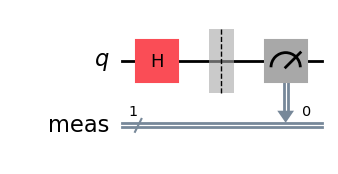

<IPython.core.display.Latex object>

a:      0
b:      1
b':      1


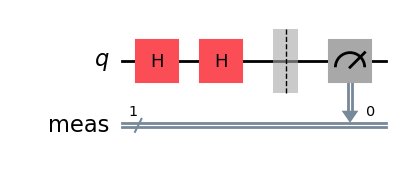

<IPython.core.display.Latex object>

a:      1
b:      0
b':      0


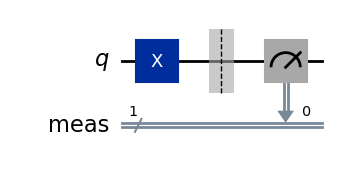

<IPython.core.display.Latex object>

a:      1
b:      0
b':      1


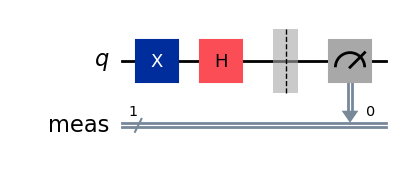

<IPython.core.display.Latex object>

a:      1
b:      1
b':      0


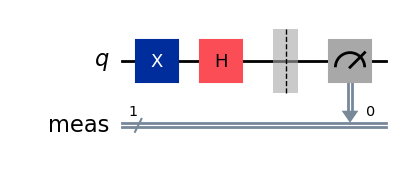

<IPython.core.display.Latex object>

a:      1
b:      1
b':      1


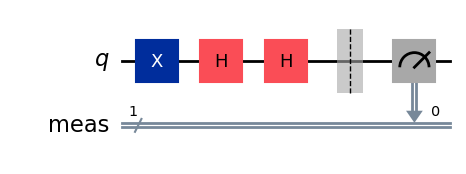

<IPython.core.display.Latex object>

   a  a_prime  b  b_prime
0  0        0  0        0
1  0        1  0        1
2  0        0  1        0
3  0        0  1        1
4  1        1  0        0
5  1        0  0        1
6  1        0  1        0
7  1        1  1        1
Sifted key:      [0, 0, 1, 1]


In [28]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
import numpy as np
import pandas as pd
from qiskit.quantum_info import Statevector

# Define the number of qubits
n = 1
# Key sifting: introducing an empty list to discard bits where bases don't match at the end of proccess
sifted_key = []
# List to store results
results = []

# Generate random bits and bases
np.random.seed(42)  # For reproducibility
for a in [0, 1]:
    for b in [0, 1]:
        for b_prime in [0, 1]:
            print("a:     ", a)
            print("b:     ", b)
            print("b':     ", b_prime)

            # Prepare Alice's quantum circuit
            alice_circuit = QuantumCircuit(n)
            if a == 1:
                alice_circuit.x(0)
            if b == 1:
                alice_circuit.h(0)

            # Measure in Bob's bases
            if b_prime == 1:
                alice_circuit.h(0)
            state = Statevector.from_instruction(alice_circuit)
            # Create the measurement circuit
            alice_circuit.measure_all()
            display(alice_circuit.draw('mpl'))

            # Transpile the circuit for the simulator
            backend = AerSimulator()
            compiled_circuit = transpile(alice_circuit, backend)

            # Execute the circuit
            result = backend.run(compiled_circuit).result()
            counts = result.get_counts()

            # Extract Bob's bits
            a_prime = int(list(counts.keys())[0], 2)
            if b == b_prime:
              sifted_key.append(a)
            # Append results to the list
            results.append({'a': a,'a_prime': a_prime,'b': b,'b_prime': b_prime})
            display(state.draw('latex'))
# Create a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)
print("Sifted key:     ", sifted_key)